In [2]:
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common import results_plotter
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

import pickle
# from shortcut import multi_types
import numpy as np
import matplotlib.pyplot as plt
import collections


real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""


In [3]:
def moving_average(values, window, n=1):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    import pandas as pd
    rolled = pd.Series(values).rolling(window)
    std = np.array(rolled.std())/np.sqrt(n)
    mean = np.array(rolled.mean())
    # weights = np.repeat(1.0, window) / window
    return mean, std#np.convolve(values, weights, "valid"), std


def plot_results(log_folder, 
                 title="Smoothed learning Curve", 
                 label = None,
                 window = 75,
                 ylim = None,
                 cap = 9_500,
                 n = 0,
                 ):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    if n:
        ys = []
        xs = []
        for i in range(n):
            x, y = ts2xy(load_results(log_folder[:-1]+str(i)), "timesteps")
            # cap = min(len(y), len(ys[-1]))
            ys.append(y[:cap])
            xs.append(x[:cap])
            print(len(y)) 
        
        y = np.mean(ys, axis=0)
        x = np.mean(xs, axis=0, dtype=int)
        
    else:
        x, y = ts2xy(load_results(log_folder), "timesteps")
    y, std = moving_average(y, window=window, n=n if n else 1)
    # Truncate x
    x = x[len(x) - len(y) :]
    if n:
        x = x[:9_500]
        x = x[~np.isnan(y)]
        y = y[~np.isnan(y)]
        std = np.std(y, axis=0)/np.sqrt(n)
        print(std)

    fig = plt.figure(title)
    if label is None:
        label = 'mean rewards $\pm 2\sigma$'
    plt.plot(x, y, label=label)
    # plt.fill_between(x, y - 2*std, y + 2*std, alpha=0.2)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
    if ylim is not None:
        plt.ylim(ylim)
    plt.title(title)
    # plt.legend()
    # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return x
    # plt.show()

<>:57: SyntaxWarning: invalid escape sequence '\p'
<>:57: SyntaxWarning: invalid escape sequence '\p'
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_36864/758378913.py:57: SyntaxWarning: invalid escape sequence '\p'
  label = 'mean rewards $\pm 2\sigma$'


## Small

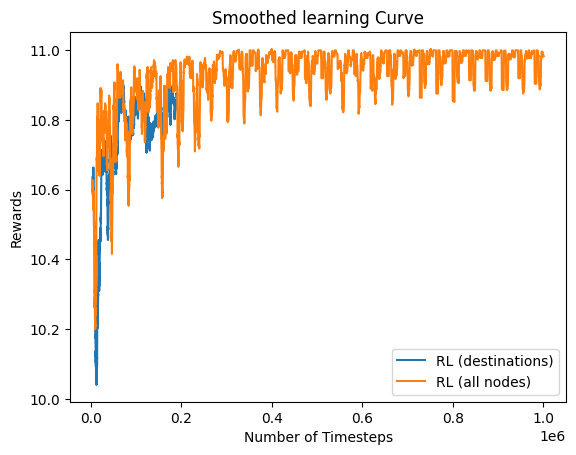

In [101]:
real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 20
# log_dir_assignment = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(assignment)_steps(150000)_instanceID0/'
log_dir_assignment = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(assignment)_steps(500000)_instanceID0/'
# log_dir_multi = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(multi)_steps(150000)_instanceID0/'
log_dir_multi = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(multi)_steps(500000)_instanceID0/'
log_dir_elimination = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(elimination_gain)_steps(500000)_instanceID0/'
# log_dir = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(multi)_steps(1000000)' #all nodes
log_dir_change_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_steps(1000000)' #all nodes
log_dir_change_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_steps(1000000)' #all nodes
log_dir_change_elimination = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(elimination_gain)_steps(1000000)' #all nodes
log_dir = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(a+e)_actionMode(destinations)_steps(500000)' #all nodes
log_dir2 = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(a+e)_actionMode(all_nodes)_steps(1000000)' #all nodes
# log_dir = f'ppo_mask/rewardMode(normalized_terminal)_obsMode(routes)_steps(350000)/'
# log_dir = f'./'
# Helper from the library
# results_plotter.plot_results(
#     [log_dir_change_elimination], 5e5, results_plotter.X_TIMESTEPS, "PPO maskable", (8, 5)
# )

# x = plot_results(log_dir_change_multi, window=100, label='RL (multi)')
# x = plot_results(log_dir_change_assignment, window=100, label='RL (assignment)')
# x = plot_results(log_dir_change_elimination, window=100, label='RL (elimination gain)')
x = plot_results(log_dir, window=500, label='RL (destinations)')
x = plot_results(log_dir2, window=500, label='RL (all nodes)')
plt.legend()

## Real

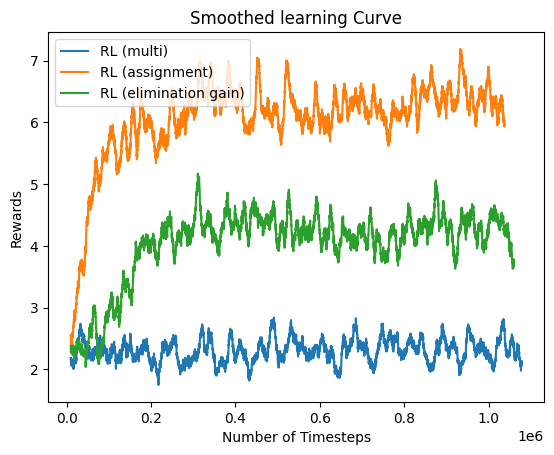

In [64]:
real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100
# log_dir_assignment = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(assignment)_steps(150000)_instanceID0/'
log_dir_assignment = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(assignment)_steps(500000)_instanceID0/'
# log_dir_multi = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(multi)_steps(150000)_instanceID0/'
log_dir_multi = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(multi)_steps(500000)_instanceID0/'
log_dir_elimination = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(elimination_gain)_steps(500000)_instanceID0/'
# log_dir = f'methods/static/ppo_mask/{real}K100_rewardMode(aq)_obsMode(multi)_steps(1000000)' #all nodes
log_dir_change_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_steps(1000000)' #all nodes
log_dir_change_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_steps(1000000)' #all nodes
log_dir_change_elimination = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(elimination_gain)_steps(1000000)' #all nodes
# log_dir = f'ppo_mask/rewardMode(normalized_terminal)_obsMode(routes)_steps(350000)/'
# log_dir = f'./'
# Helper from the library
# results_plotter.plot_results(
#     [log_dir_change_elimination], 5e5, results_plotter.X_TIMESTEPS, "PPO maskable", (8, 5)
# )

x = plot_results(log_dir_change_multi, window=100, label='RL (multi)')
x = plot_results(log_dir_change_assignment, window=100, label='RL (assignment)')
x = plot_results(log_dir_change_elimination, window=100, label='RL (elimination gain)')
# x = plot_results(log_dir, window=50, label='RL (all nodes)')
plt.legend()

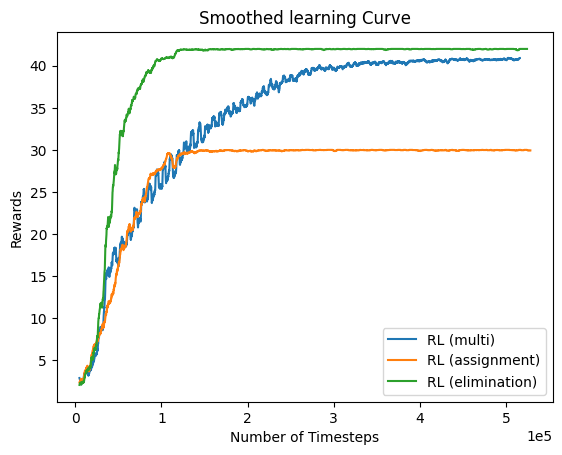

In [55]:
x = plot_results(log_dir_multi, window=50, label='RL (multi)')
x = plot_results(log_dir_assignment, window=50, label='RL (assignment)')
x = plot_results(log_dir_elimination, window=50, label='RL (elimination)')
# x = plot_results(log_dir, window=50, label='RL (all nodes)')
plt.legend()
# x = plot_results(f'ppo_mask/K50_rewardMode(normalized_terminal)_obsMode(routes)_steps(100000)_instanceID0/', window=200, label='RL (routes)')

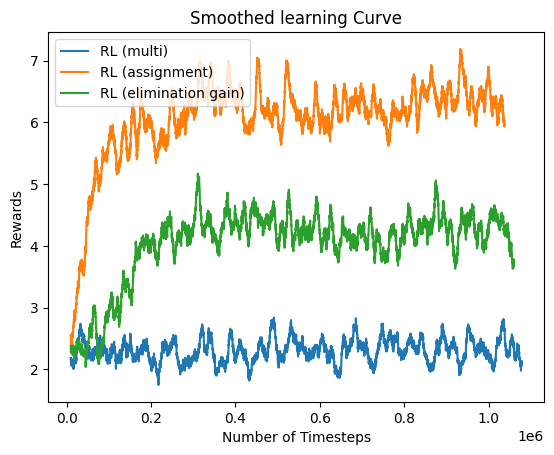

## Cluster

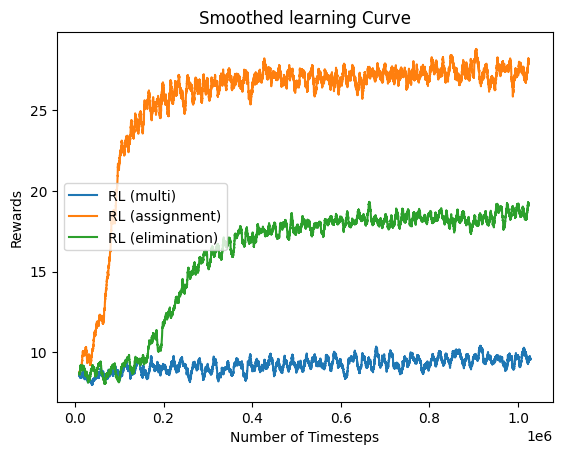

In [65]:
real_data = False
cluster_data = True
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 50
# log_dir_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_steps(150000)_instanceID0/'
log_dir_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_steps(500000)_instanceID0/'
# log_dir_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_steps(150000)_instanceID0/'
log_dir_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_steps(500000)_instanceID0/'
log_dir_elimination = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(elimination_gain)_steps(500000)_instanceID0/'
log_dir_change_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_steps(1000000)' #all nodes
log_dir_change_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_steps(1000000)' #all nodes
log_dir_change_elimination = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(elimination_gain)_steps(1000000)' #all nodes

x = plot_results(log_dir_change_multi, window=250, label='RL (multi)')
x = plot_results(log_dir_change_assignment, window=250, label='RL (assignment)')
x = plot_results(log_dir_change_elimination, window=250, label='RL (elimination)')
# x = plot_results(log_dir, window=50, label='RL (all nodes)')
plt.legend()

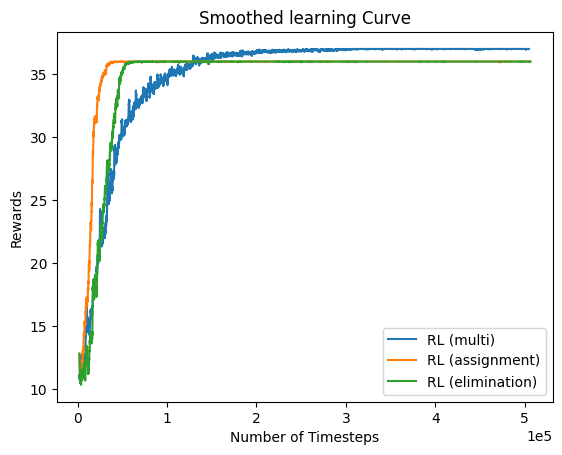

In [58]:
x = plot_results(log_dir_multi, window=50, label='RL (multi)')
x = plot_results(log_dir_assignment, window=50, label='RL (assignment)')
x = plot_results(log_dir_elimination, window=50, label='RL (elimination)')
# x = plot_results(log_dir, window=50, label='RL (all nodes)')
plt.legend()
# x = plot_results(f'ppo_mask/K50_rewardMode(normalized_terminal)_obsMode(routes)_steps(100000)_instanceID0/', window=200, label='RL (routes)')

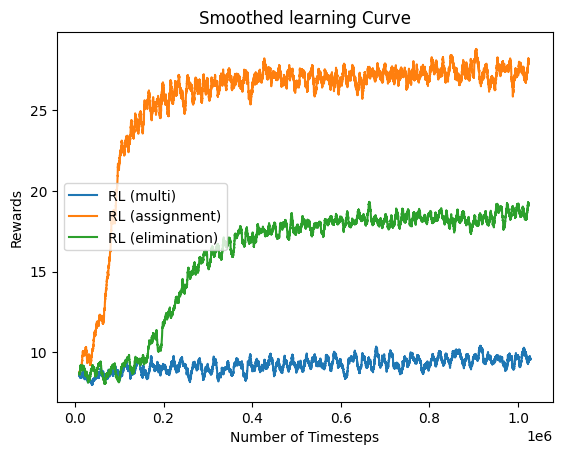

In [59]:
x = plot_results(log_dir_change_multi, window=250, label='RL (multi)')
x = plot_results(log_dir_change_assignment, window=250, label='RL (assignment)')
x = plot_results(log_dir_change_elimination, window=250, label='RL (elimination)')
# x = plot_results(log_dir, window=50, label='RL (all nodes)')
plt.legend()
# x = plot_results(f'ppo_mask/K50_rewardMode(normalized_terminal)_obsMode(routes)_steps(100000)_instanceID0/', window=200, label='RL (routes)')

## Uniforme

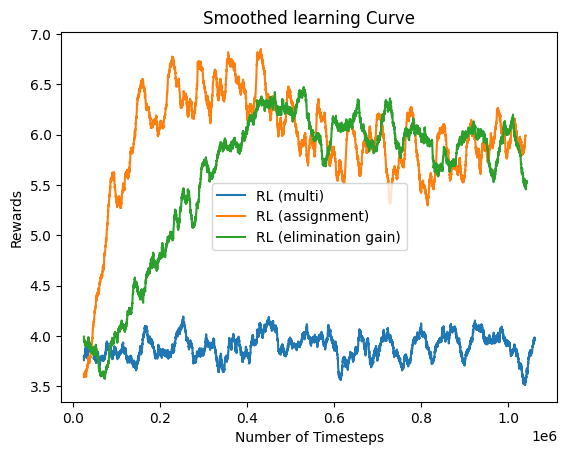

In [66]:
real_data = False
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100
# log_dir_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_steps(150000)_instanceID0/'
log_dir_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_steps(500000)_instanceID0/'
# log_dir_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_steps(150000)_instanceID0/'
log_dir_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_steps(500000)_instanceID0/'
log_dir_elimination = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(elimination_gain)_steps(500000)_instanceID0/'
log_dir_change_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_steps(1000000)' #all nodes
log_dir_change_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_steps(1000000)' #all nodes
log_dir_change_elimination = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(elimination_gain)_steps(1000000)' #all nodes

# # log_dir = f'ppo_mask/rewardMode(normalized_terminal)_obsMode(routes)_steps(350000)/'
# # log_dir = f'./'
# # Helper from the library
# results_plotter.plot_results(
#     [log_dir_change_assignment], 5e5, results_plotter.X_TIMESTEPS, "PPO maskable", (8, 5)
# )

x = plot_results(log_dir_change_multi, window=250, label='RL (multi)')
x = plot_results(log_dir_change_assignment, window=250, label='RL (assignment)')
x = plot_results(log_dir_change_elimination, window=250, label='RL (elimination gain)')

plt.legend()